In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [19]:
class NadarayaKernel:

    def __init__(self, bandwidth = 1):
        self.data = None
        self.yi = None
        self.bandwidth = bandwidth

    def fit(self, data):
        self.data = np.array(data.drop(['yield'], axis=1))
        self.yi = np.array(data['yield'])

    def kernel(self, x, xi):
        d = x.shape[0]
        # print(x.shape, xi.shape)
        # print((x - xi).shape, self.bandwidth.shape)
        # print(np.matmul((x - xi), self.bandwidth))
        diff = x-xi
        norm = np.linalg.norm(diff)
        argument = norm / self.bandwidth
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * argument**2)

    def evaluate(self, x):
        sum1 = 0
        sum2 = 0
        for i, xi in enumerate(self.data):
            kernel = self.kernel(x, xi)
            sum1 += kernel * self.yi[i]
            sum2 += kernel
        return 0 if sum2 == 0 else sum1 / sum2

    def predict(self, test):
        test = np.array(test)
        test_expanded = test[:, np.newaxis, :]
        data_expanded = self.data[np.newaxis, :, :]

        # print(test_expanded.shape, data_expanded.shape)

        diff = (test_expanded - data_expanded)/self.bandwidth
        nor = np.sum(diff**2, axis=2)
        kernel_values = (1 / np.sqrt(2 * np.pi))**16 * np.exp(-0.5 * (nor / self.bandwidth)**2)
        # kernel_values = np.where(nor >= 1, 0, 3 * (1 - nor) / (4 * self.bandwidth))
        # nor = np.where(nor >= 1, 1, nor)
        # kernel_values = 3*40320*(1-nor)/(np.pi**8)
        kernel_values_sum = np.sum(kernel_values, axis=1)

        kernel_values_sum = np.where(kernel_values_sum == 0, 1, kernel_values_sum)

        # print(kernel_values.shape, kernel_values_sum.shape)
        # print(kernel_values_sum)
        return np.sum(kernel_values * self.yi, axis=1) / kernel_values_sum

In [4]:
data = pd.read_csv('train.csv')
data

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,639.0,25.0,0.50,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.402948,0.409261,31.274591,4418.44126
1,1,124.0,12.5,0.25,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.500438,0.445494,34.467567,5862.80545
2,2,485.0,25.0,0.50,0.25,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.509001,0.459421,36.624966,6079.08526
3,3,324.0,12.5,0.25,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.583379,0.498056,40.865478,7400.77538
4,4,235.0,12.5,0.25,0.25,0.50,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.447669,0.423764,33.298861,4858.24073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,258.0,12.5,0.25,0.25,0.50,0.63,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.335927,0.352186,28.793440,3182.69865
14996,14996,256.0,12.5,0.25,0.25,0.38,0.63,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.545095,0.470719,38.042756,5862.80545
14997,14997,324.0,12.5,0.25,0.25,0.75,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.481801,0.442535,35.414082,5569.13925
14998,14998,691.0,25.0,0.50,0.38,0.38,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.552359,0.470847,38.625436,6795.88187


In [5]:
data.drop(['id', 'Row#'], axis=1, inplace=True)

In [6]:
train_x = data.drop(['yield'], axis=1)
train_y = data['yield']

In [7]:
train = data[:int(0.8*len(data))]
test = data[int(0.8*len(data)):]

In [8]:
test_answers = test['yield']

In [9]:
test = test.drop(['yield'], axis=1)

In [10]:
# testing = pd.read_csv('test.csv')
# test_ids = testing['id']
# testing.drop(['id', 'Row#'], axis=1, inplace=True)

In [11]:
# submission = pd.DataFrame(columns=['id', 'yield'])
# submission['id'] = test_ids
# for i in tqdm(range(len(testing))):
#     submission.loc[i, 'yield'] = kernel.evaluate(np.array(testing.iloc[i]))

In [12]:
# function/len(test)

In [13]:
# submission.to_csv('submission_1.csv', index=False)

In [14]:
# np.sum(np.abs(function - test_answers)) / len(test_answers)

In [20]:
kernel_now = NadarayaKernel(bandwidth=1)
kernel_now.fit(train)
predict_train = kernel_now.predict(test)
np.sum(np.abs(predict_train - test_answers)) / len(test_answers)

338.7243371050752

In [21]:
cross = []
x = []
for i in np.linspace(1, 3, 10):
    kernel_now = NadarayaKernel(bandwidth=i)
    kernel_now.fit(train)
    predict_train = kernel_now.predict(test)
    alpha = np.sum(np.abs(predict_train - test_answers)) / len(test_answers)
    print('------------', alpha)
    cross.append(alpha)
    x.append(i)

------------ 338.7243371050752
------------ 343.8427722697462
------------ 355.31829171369094


KeyboardInterrupt: 

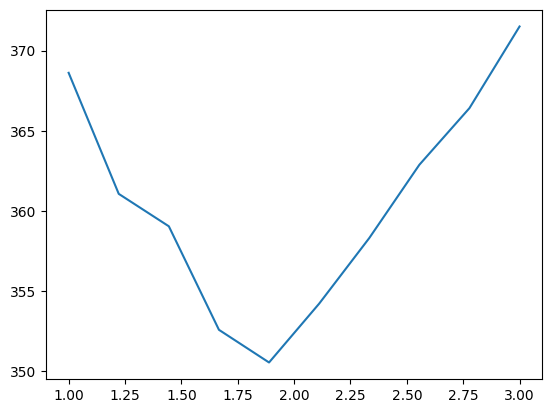

In [17]:
plt.plot(x, cross)
plt.show()

In [18]:
np.argmin(cross)

4